In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

import estimateGaussian as eg
import multivariateGaussian as mvg
import visualizeFit as vf
import selectThreshold as st

%matplotlib inline

Visualizing example dataset for outlier detection.
Program paused. Press ENTER to continue


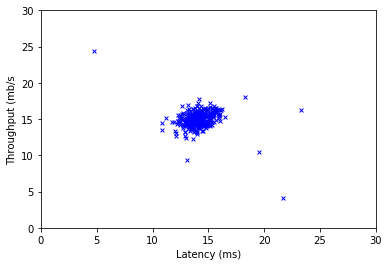

In [3]:
plt.ion()
# np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

# ===================== Part 1: Load Example Dataset =====================
# We start this exercise by using a small dataset that is easy to visualize.
#
# Our example case consists of two network server statistics across
# several machines: the latency and throughput of each machine.
# This exercise will help us find possibly faulty (or very fast) machines
#

print('Visualizing example dataset for outlier detection.')

#  The following command loads the dataset. You should now have the
#  variables X, Xval, yval in your environment.
data = scio.loadmat('ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

# Visualize the example dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='b', marker='x', s=15, linewidth=1)
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s')

print('Program paused. Press ENTER to continue')

In [16]:
def estimate_gaussian(X):
    # Useful variables
    m, n = X.shape

    # You should return these values correctly
    # mu = np.zeros(n)
    # sigma2 = np.zeros(n)

    # ===================== Your Code Here =====================
    # Instructions: Compute the mean of the data and the variances
    #               In particular, mu[i] should contain the mean of
    #               the data for the i-th feature and sigma2[i]
    #               should contain variance of the i-th feature
    #
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)

    # ==========================================================

    return mu, sigma2


In [17]:
estimate_gaussian(X)

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

Visualizing Gaussian fit.
Program paused. Press ENTER to continue


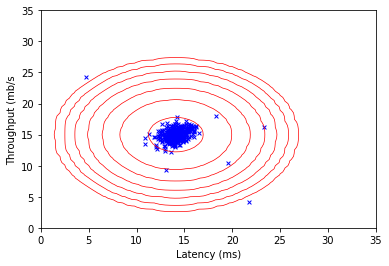

In [70]:

# ===================== Part 2: Estimate the dataset statistics =====================
# For this exercise, we assume a Gaussian distribution for the dataset.
#
# We first estimate the parameters of our assumed Gaussian distribution,
# then compute the probabilities for each of the points and then visualize
# both the overall distribution and where each of the points falls in
# terms of that distribution
#
print('Visualizing Gaussian fit.')

# Estimate mu and sigma2
# mu, sigma2 = eg.estimate_gaussian(X)
mu, sigma2 = estimate_gaussian(X)

# Returns the density of the multivariate normal at each data point(row) of X
p = mvg.multivariate_gaussian(X, mu, sigma2)

# Visualize the fit
vf.visualize_fit(X, mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s')

print('Program paused. Press ENTER to continue')

In [71]:
from sklearn.metrics import f1_score

def select_threshold(yval, pval):
    f1 = 0

    # You have to return these values correctly
    best_eps = 0
    best_f1 = 0

    for epsilon in np.linspace(np.min(pval), np.max(pval), num=1001):
        # ===================== Your Code Here =====================
        # Instructions: Compute the F1 score of choosing epsilon as the
        #               threshold and place the value in F1. The code at the
        #               end of the loop will compare the F1 score for this
        #               choice of epsilon and set it to be the best epsilon if
        #               it is better than the current choice of epsilon.
        #
        # Note : You can use predictions = pval < epsilon to get a binary vector
        #        of False(0)'s and True(1)'s of the outlier predictions
        #

        y_pred = list(map(lambda b: 1 if b else 0, pval < epsilon))
        f1 = f1_score(yval, y_pred)
        
        # ==========================================================

        if f1 > best_f1:
            best_f1 = f1
            best_eps = epsilon

    return best_eps, best_f1


/Users/dream/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best epsilon found using cross-validation: 8.9909e-05
Best F1 on Cross Validation Set: 0.875000
(you should see a value epsilon of about 8.99e-05 and F1 of about 0.875)
Program paused. Press ENTER to continue


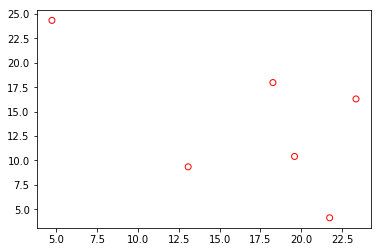

In [72]:

# ===================== Part 3: Find Outliers =====================
# Now you will find a good epsilon threshold using a cross-validation set
# probabilities given the estimated Gaussian distribution
#
pval = mvg.multivariate_gaussian(Xval, mu, sigma2)

# epsilon, f1 = st.select_threshold(yval, pval)
epsilon, f1 = select_threshold(yval, pval)
print('Best epsilon found using cross-validation: {:0.4e}'.format(epsilon))
print('Best F1 on Cross Validation Set: {:0.6f}'.format(f1))
print('(you should see a value epsilon of about 8.99e-05 and F1 of about 0.875)')

# Find outliers in the training set and plot
outliers = np.where(p < epsilon)
plt.scatter(X[outliers, 0], X[outliers, 1], marker='o', facecolors='none', edgecolors='r')

print('Program paused. Press ENTER to continue')

In [74]:

# ===================== Part 4: Multidimensional Outliers =====================
# We will now use the code from the previous part and apply it to a
# harder problem in which more features describe each datapoint and only
# some features indicate whether a point is an outlier.
#

# Loads the second dataset.
data = scio.loadmat('ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

# Apply the same steps to the larger dataset
# mu, sigma2 = eg.estimate_gaussian(X)
mu, sigma2 = estimate_gaussian(X)

# Training set
p = mvg.multivariate_gaussian(X, mu, sigma2)

# Cross Validation set
pval = mvg.multivariate_gaussian(Xval, mu, sigma2)

# Find the best threshold
# epsilon, f1 = st.select_threshold(yval, pval)
epsilon, f1 = select_threshold(yval, pval)

print('Best epsilon found using cross-validation: {:0.4e}'.format(epsilon))
print('Best F1 on Cross Validation Set: {:0.6f}'.format(f1))
print('# Outliers found: {}'.format(np.sum(np.less(p, epsilon))))
print('(you should see a value epsilon of about 1.38e-18, F1 of about 0.615, and 117 outliers)')

print('ex8 Finished. Press ENTER to exit')


/Users/dream/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best epsilon found using cross-validation: 1.3772e-18
Best F1 on Cross Validation Set: 0.615385
# Outliers found: 117
(you should see a value epsilon of about 1.38e-18, F1 of about 0.615, and 117 outliers)
ex8 Finished. Press ENTER to exit
